In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [567]:
dataset = pd.read_csv('/content/diabetes.csv')

In [568]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [569]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [570]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=26)

In [571]:
dataset.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [572]:
features_to_drop = ['SkinThickness']

df = dataset.drop(columns=features_to_drop)


In [573]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
## training
clf = clf.fit(X_train, y_train)

In [574]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [575]:
prediction = clf.predict(X_test)
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [576]:
clf.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [577]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, classification_report
accuracy_score(y_test, prediction)

0.7142857142857143

In [578]:
confusion_matrix(y_test, prediction, labels=[0,1])

array([[38,  9],
       [13, 17]])

In [579]:
precision_score(y_test, prediction)

0.6538461538461539

In [580]:
recall_score(y_test, prediction)

0.5666666666666667

In [581]:
print(classification_report(y_test, prediction, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.75      0.81      0.78        47
      benign       0.65      0.57      0.61        30

    accuracy                           0.71        77
   macro avg       0.70      0.69      0.69        77
weighted avg       0.71      0.71      0.71        77



In [582]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [583]:
clf.feature_importances_

array([0.05806667, 0.31502122, 0.08801561, 0.08254718, 0.06872307,
       0.16378287, 0.11064044, 0.11320295])

In [584]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Glucose,0.315021
BMI,0.163783
Age,0.113203
DiabetesPedigreeFunction,0.110640
BloodPressure,0.088016
SkinThickness,0.082547
Insulin,0.068723
Pregnancies,0.058067


In [585]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['Glucose',
 'BMI',
 'Age',
 'DiabetesPedigreeFunction',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Pregnancies']

<Axes: >

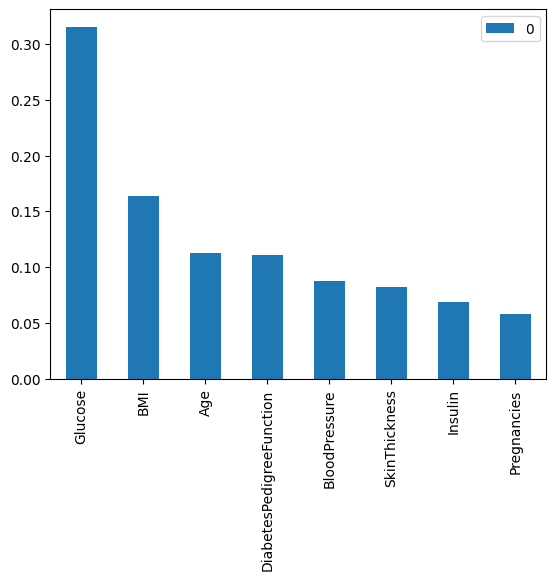

In [586]:
feature_importance.head(10).plot(kind='bar')

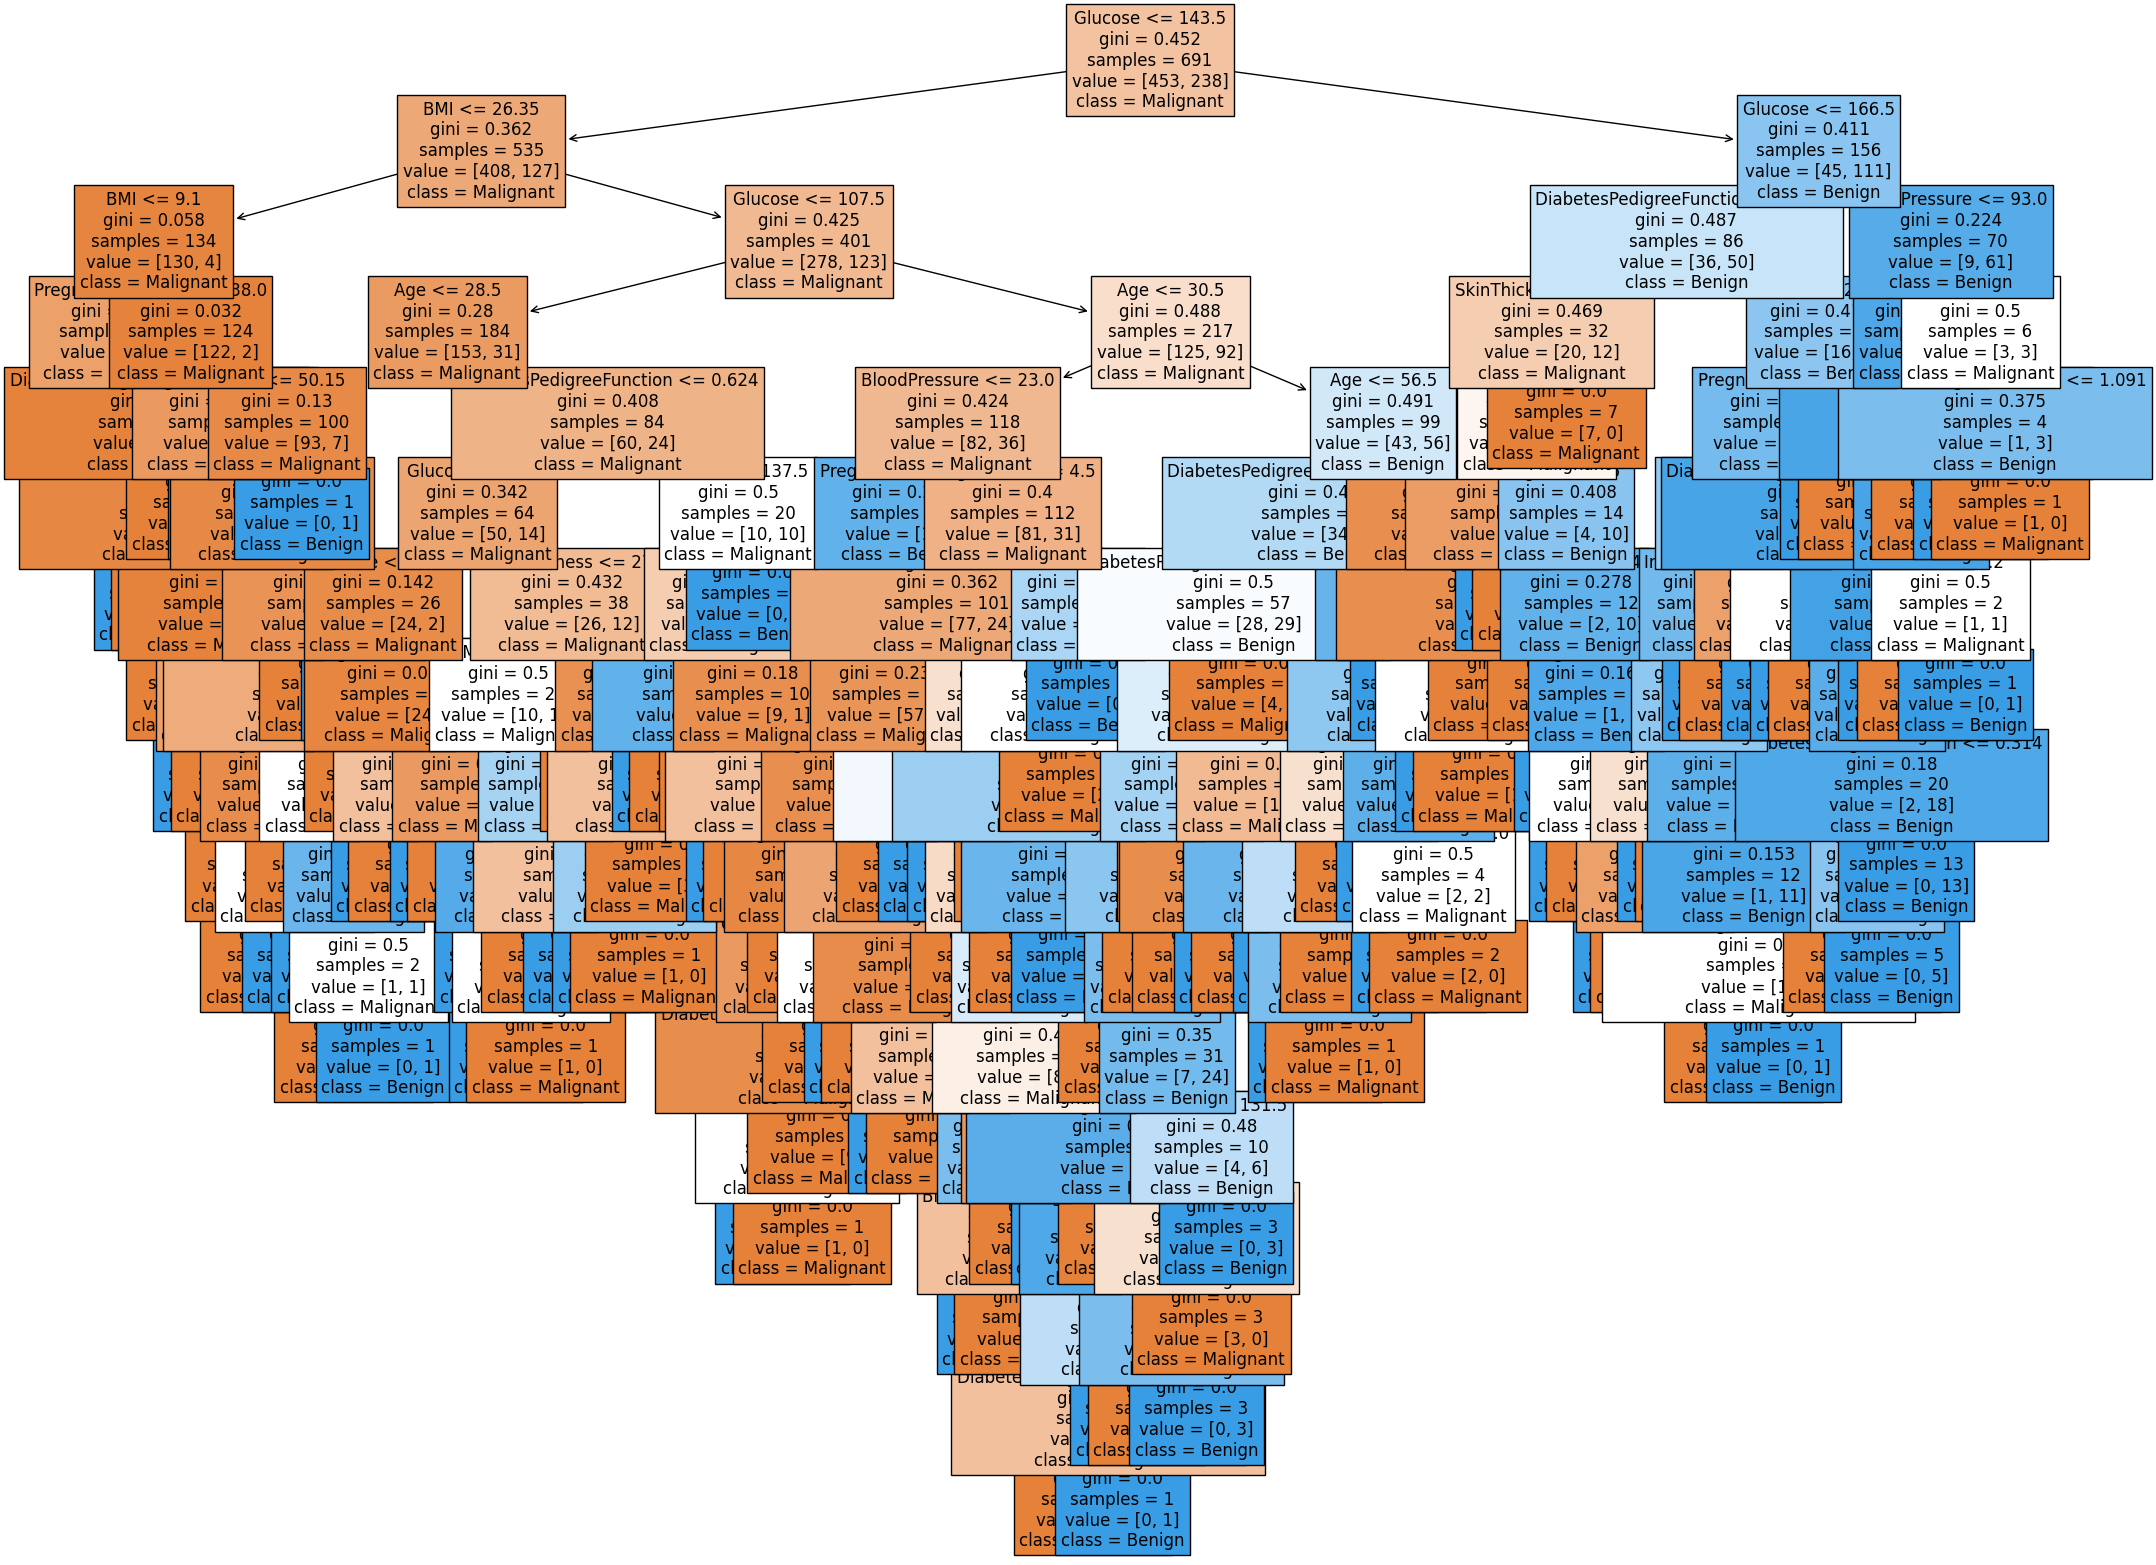

In [587]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

In [588]:
clf3 = DecisionTreeClassifier(ccp_alpha= 0.01)
## training
clf3 = clf3.fit(X_train, y_train)

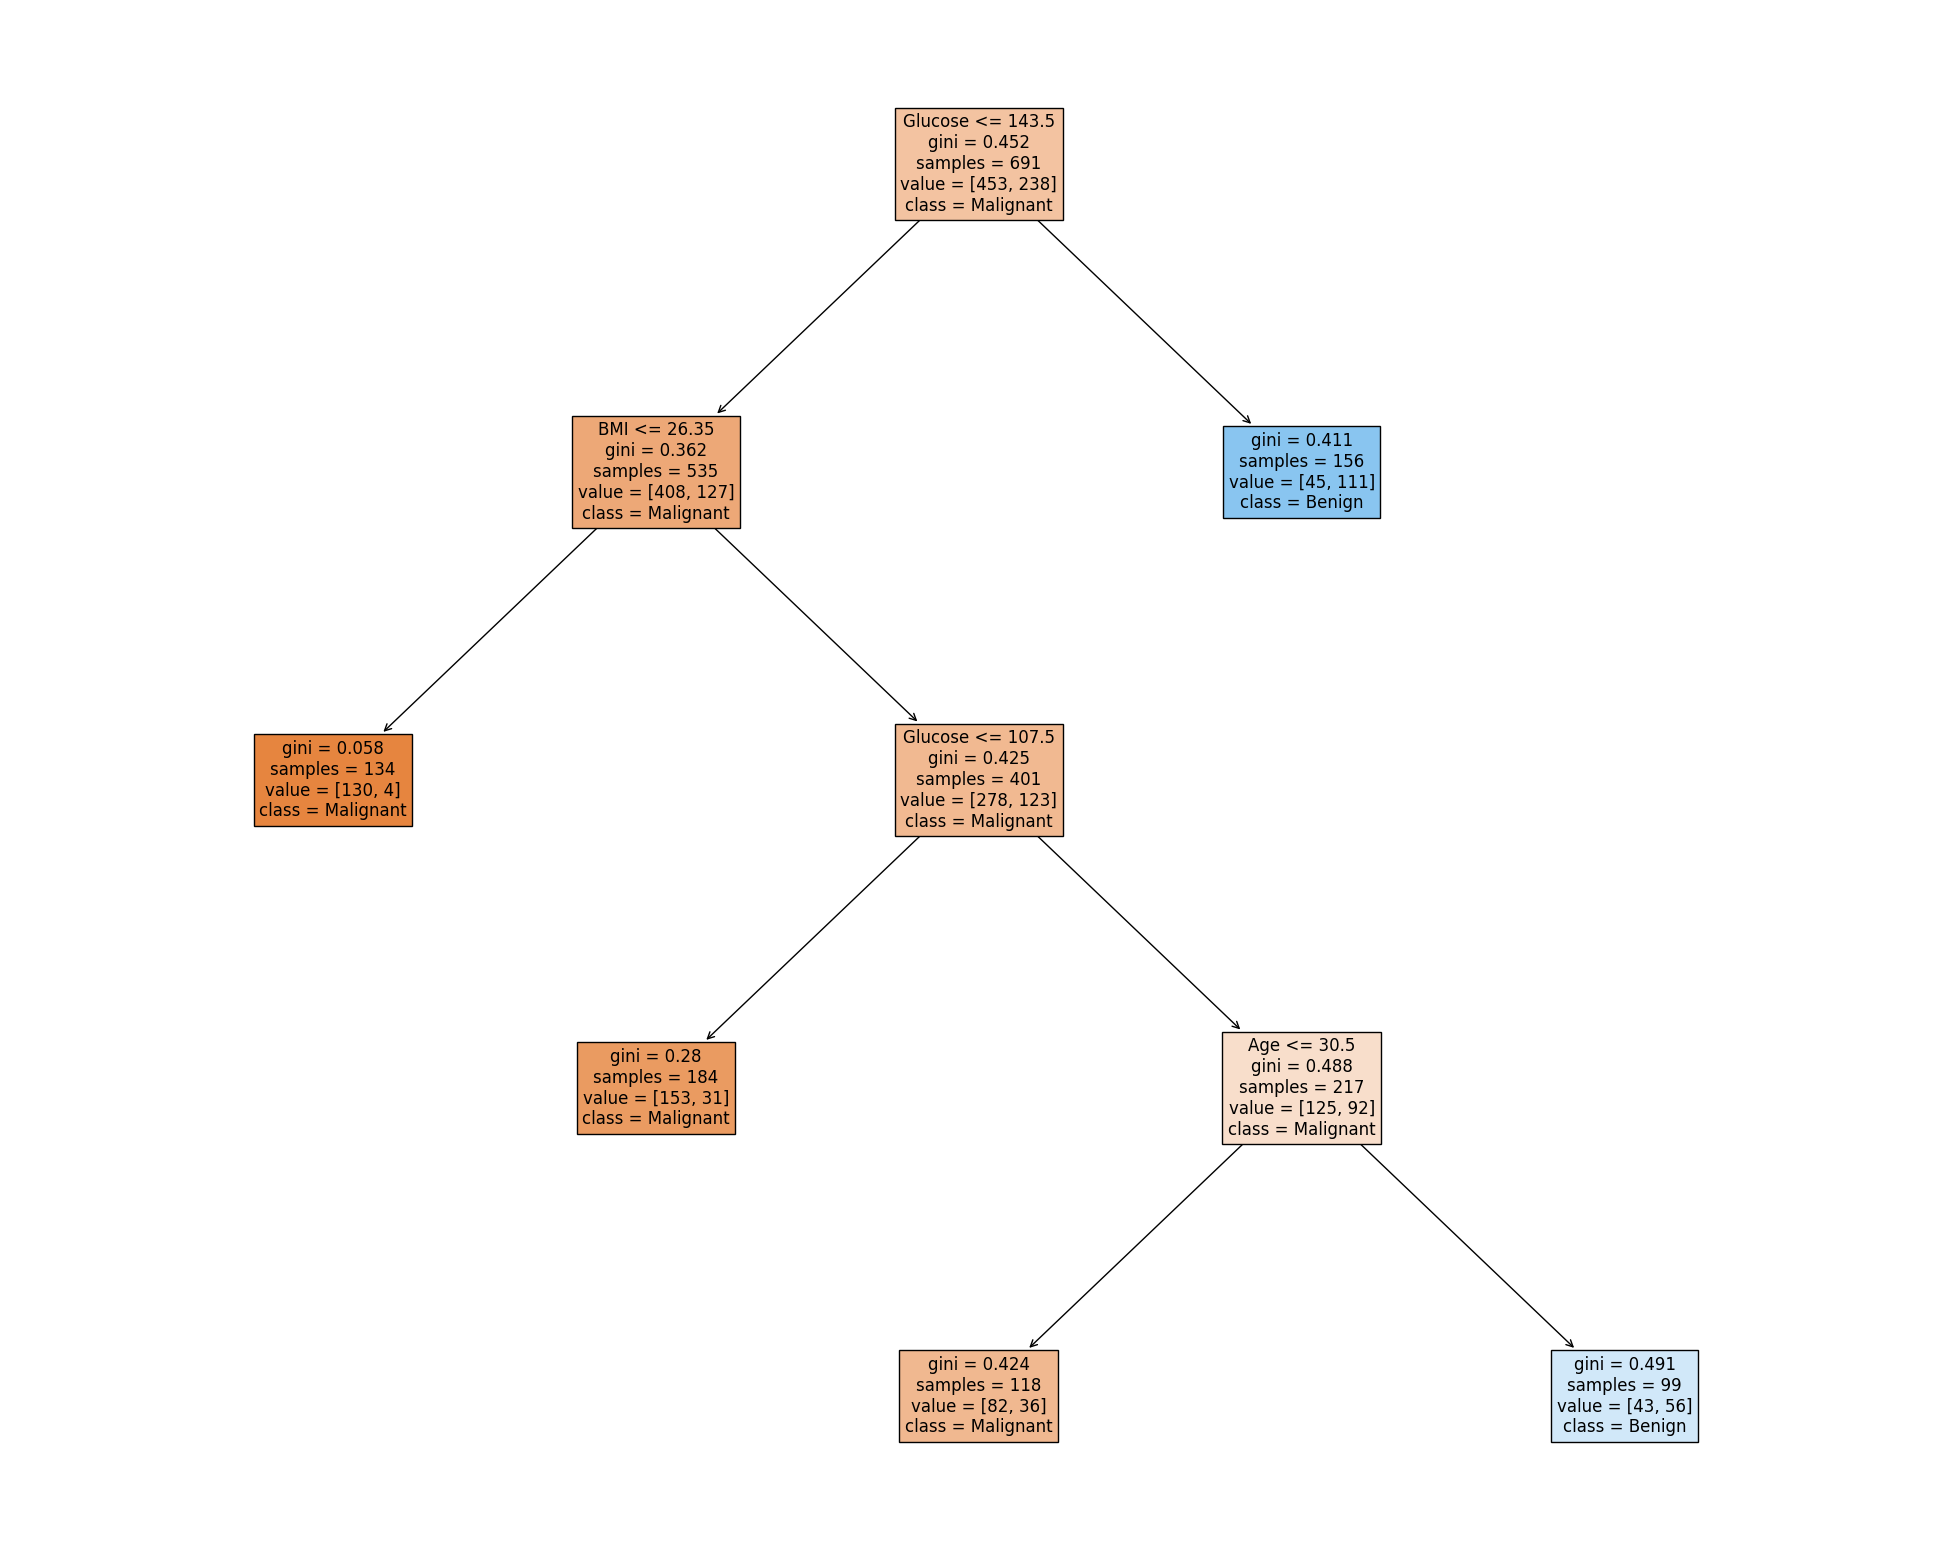

In [589]:
fig3 = plt.figure(figsize=(25,20))
_3 = tree.plot_tree(clf3,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

In [590]:
## checking the accuracy after the pruning
predictions3 = clf3.predict(X_test)
predictions3

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [591]:
print(classification_report(y_test, predictions3, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.86      0.81      0.84        47
      benign       0.73      0.80      0.76        30

    accuracy                           0.81        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.81      0.81      0.81        77



In [592]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [593]:
# split Data
X = dataset.drop(columns={"Outcome"},axis=1)
y =dataset["Outcome"].values.reshape(-1,1) #target

In [594]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (691, 8)
y_train shape: (691, 1)
X_test shape: (77, 8)
y_test shape: (77, 1)


In [595]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [596]:
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [597]:
print(error)
print(accuracy)

[0.24675324675324672, 0.23376623376623373, 0.22077922077922074, 0.22077922077922074, 0.20779220779220775, 0.16883116883116878, 0.1558441558441559, 0.19480519480519476, 0.19480519480519476, 0.19480519480519476, 0.18181818181818177, 0.20779220779220775, 0.20779220779220775, 0.20779220779220775, 0.22077922077922074, 0.22077922077922074, 0.20779220779220775, 0.19480519480519476, 0.22077922077922074, 0.20779220779220775]
[0.7532467532467533, 0.7662337662337663, 0.7792207792207793, 0.7792207792207793, 0.7922077922077922, 0.8311688311688312, 0.8441558441558441, 0.8051948051948052, 0.8051948051948052, 0.8051948051948052, 0.8181818181818182, 0.7922077922077922, 0.7922077922077922, 0.7922077922077922, 0.7792207792207793, 0.7792207792207793, 0.7922077922077922, 0.8051948051948052, 0.7792207792207793, 0.7922077922077922]


Text(0.5, 1.0, 'accuracy vs K')

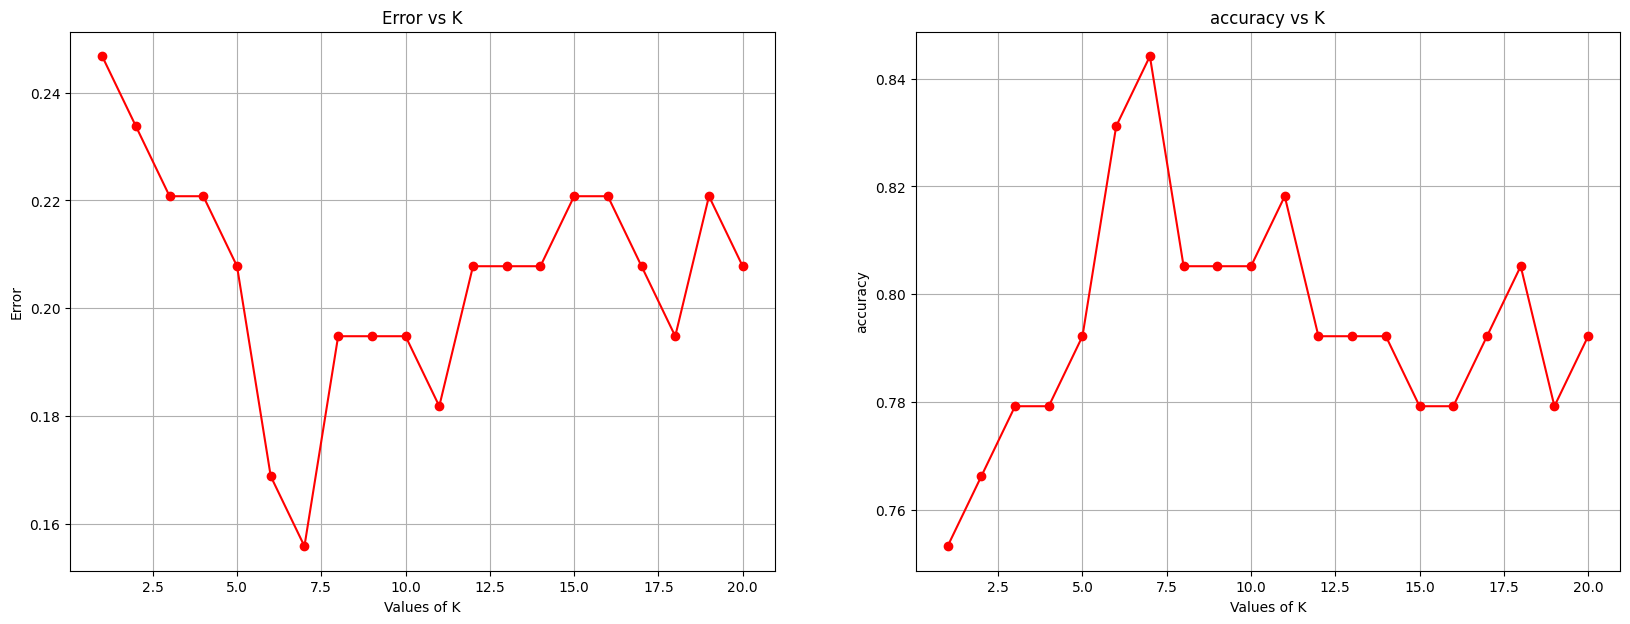

In [598]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [599]:
K=7
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8441558441558441


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [600]:

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}

knn_for_grid = KNeighborsClassifier()
grid_search_cv = GridSearchCV(knn_for_grid, param_grid,cv=5)

In [601]:
grid_search_cv.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [602]:
print(grid_search_cv.best_params_)

{'n_neighbors': 14}


In [603]:
print(grid_search_cv.best_score_)

0.7578558696205755
